# Business Understanding

Syriatel is the leading mobile telecommunications company based in Damascus, Syria. Their vision is that, by focusing solely on customer satisfaction and social responsibility they are able to present products and services of a high standard. 

The goal is to continue to drive the excellent standards of the company by predicting whether a customer will churn from doing business with SyriaTel. 

This will be helped by figuring out identifying the customer likely to churn and negotiate better conditions for them to stay on with the network provider through conversational means.

Targeting ALL customers, likely and not-likely to churn will be costly in revenue to the company and therefore it is more economically beneficial to apply the retention measures to those likely to churn only.

# Business Questions

- Is the non-provision of international plans provided the reason why customers churn?
- How much is the likelihood of churn likely to cost the organisation?
- How influential is the State on churn?

# Data Understanding

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For Train Test Split
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

#DecisionTrees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/churn.csv')

In [3]:
#Print out first 5 rows of the data set
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Identifying the columns which will be useful to find which ones to drop later

for col in df.columns:
    print (col)

state
account length
area code
phone number
international plan
voice mail plan
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls
churn


In [5]:
#Identify the total number of rows and columns

df.shape

(3333, 21)

In [6]:
#Find the types of data in the set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

We can see our output variable, churn, is a boolean. We will have to change this later

In [7]:
#Investigate the dataset for missing values

df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

As we can see there are no missing values in our dataset. This is quite fortunate in this scenario

In [8]:
#State and area code will not be useful variables in our analysis

df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

## Visualisations

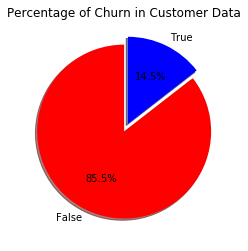

False    2850
True      483
Name: churn, dtype: int64


In [9]:
#Produce a pie chart visualisation to establish the percentage of churners in the dataset

sizes = df['churn'].value_counts(sort=True)

colors = ["red", "blue"]
labels = 'False', 'True'
explode = (0,0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Percentage of Churn in Customer Data')
plt.show()

print(sizes)

Having seen the percentage of true churns in the dataset it would now be helpful to produce a heatmap and identify the useful variables 

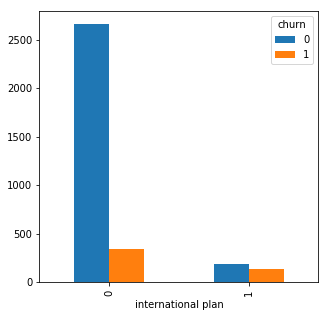

In [119]:
#Checking to see if not having an international plan has an influence on customer churn

df.groupby(['international plan', 'churn']).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5))

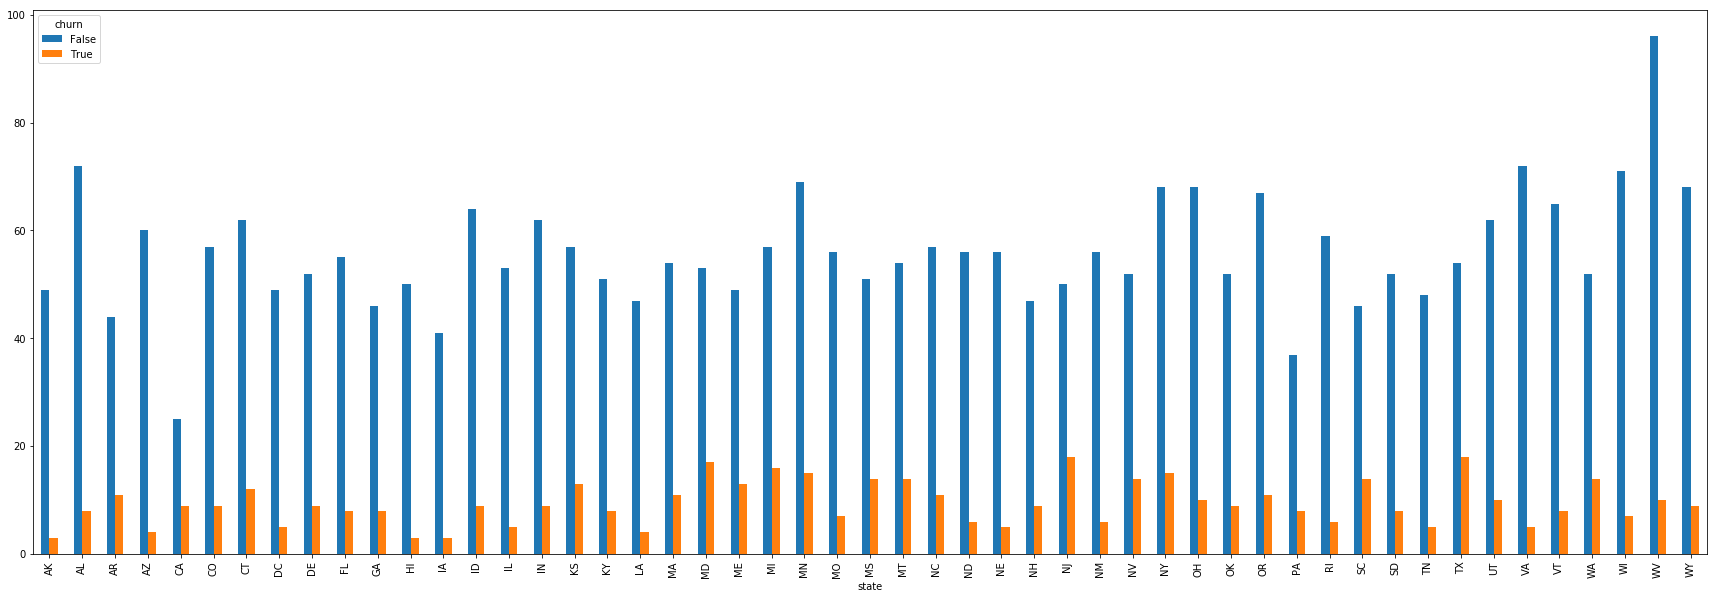

In [17]:
#Check to see the impact of churn by state

df.groupby(['state', 'churn']).size().unstack().plot(kind='bar', stacked=False, figsize=(30,10))

In [18]:
#The state and customer number columns are unecessary so we will remove those ones

df.drop(columns=['state', 'phone number'], inplace=True, axis=1)

In [19]:
#Convert the categorical data into numerical data
#International plan and voice mail plan

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])


print (df.dtypes)

account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


We can see here that the international plan and voicemail plan have been converted into integers

In [20]:
#Convert the bools of churn into integers

df['churn'] = df['churn'].astype(int)

In [21]:
#Check to see if the dtype of int has been converted

df.dtypes

account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

Finally we have a functioning set of data which will be handy to produce our baseline model

# Baseline Model

## Logistic Regression

Now I will declare my variables. My target variable (churn) and my predictors are (X)

In [22]:
X = df.drop(columns=['churn','area code'], axis=1)
y = df['churn']
X.head() #Preview the data to make sure the non influential variables have been dropped

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [23]:
#Split the data into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [24]:
#Splitting the data into train and validation datasets

X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=52)

In [25]:
#Scale the 3 datasets 

ss = StandardScaler() 

#This standardizes a feature by substracting the mean and then scaling to unit variance. 
#This is a common requirement for machine learning estimators

ss.fit(X_train_v) #Fit scaler only on training data

X_train_v = ss.transform(X_train_v)
X_val = ss.transform(X_val)

X_test = ss.transform(X_test)

In [26]:
logreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear', random_state=42)
model_log = logreg.fit(X_train_v, y_train_v)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_train_pred = model_log.predict_proba(X_train_v)[:,1]

In [28]:
model_log.score(X_train_v,y_train_v)

0.8578799249530957

In [29]:
#Creating the score for the validation dataset

model_log.score(X_val, y_val)

0.8801498127340824

88% is a good score. But it is likely overfitted.

### Measuring the accuracy and ROC_AUC

Train

In [30]:
print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred))

ROC_AUC of model = 0.8212366413250989


Validation

In [31]:
y_val_pred = model_log.predict(X_val)

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred))

ROC_AUC of model = 0.6576992627625539


65.7% was not a very good score. But it will suffice as a baseline model

# Decision Tree

Decision Trees was my first choice of learner model

In [32]:
model_dt = DecisionTreeClassifier(criterion='gini',max_depth=2, min_samples_leaf=10, 
                               random_state=100, class_weight="balanced")

model_dt.fit(X_train_v, y_train_v)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Train Score

In [33]:
y_train_pred = model_dt.predict_proba(X_train_v)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred))

ROC_AUC of model = 0.7944190802301803


Validation Score

In [34]:
y_val_pred = model_dt.predict(X_val)

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred))

ROC_AUC of model = 0.73645847823063


73.6% was not a bad score but this could be improved with some hyperparameter tuning

### Decision Tree Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Maximum depth - reducing the depth of the tree helps to build a generalised tree this can be set to a maximum value of 10
#if max_depth is too deep then we face the risk of overfitting and will lead to learning granular information
#if max_depth is too shallow then we face underfitting and thus we won't know enough learning information of the data

#min_samples_leaf identifies the number of samples that we want the leaf node to contain and describes the minimum number of samples at the leaves , the tree base
skf = StratifiedKFold(n_splits=3, random_state=110, shuffle=True)
ParamGrid = {'max_depth': range(1,10), 'min_samples_leaf': [5,10,15,20]}
optimalmodel_dt = GridSearchCV(DecisionTreeClassifier(random_state=48), ParamGrid, cv=skf, scoring="roc_auc")
optimalmodel_dt.fit(X_train, y_train) #Here we will use the entire train data set as we are doing cross validation

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=110, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=48,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
         

In [36]:
print('Values of the optimised hyperparameters\n for the best model found:\n',optimalmodel_dt.best_params_)
optimalmodel_dt.best_score_

Values of the optimised hyperparameters
 for the best model found:
 {'max_depth': 6, 'min_samples_leaf': 20}


0.9015292140538281

In [37]:
pd.DataFrame(optimalmodel_dt.cv_results_) #Number of test score columns*number of rows are how many tests were carried out

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004863,0.000639,0.002397,0.000049,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.632508,0.622561,0.634204,0.629758,0.005136,33
1,0.004853,0.000631,0.002367,0.000170,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.632508,0.622561,0.634204,0.629758,0.005136,33
2,0.004828,0.000480,0.002285,0.000110,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.632508,0.622561,0.634204,0.629758,0.005136,33
3,0.005577,0.000609,0.003706,0.001501,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.632508,0.622561,0.634204,0.629758,0.005136,33
4,0.010094,0.003273,0.004101,0.001449,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.756184,0.744621,0.741321,0.747376,0.006373,29
5,0.006725,0.001630,0.003083,0.000786,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.756184,0.744621,0.741321,0.747376,0.006373,29
6,0.005499,0.000233,0.002227,0.000122,2,15,"{'max_depth': 2, 'min_samples_leaf': 15}",0.756184,0.744621,0.741321,0.747376,0.006373,29
7,0.005421,0.000156,0.002217,0.000074,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.756184,0.744621,0.741321,0.747376,0.006373,29
8,0.006684,0.000053,0.002160,0.000065,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.851778,0.822989,0.828484,0.834417,0.012480,27
9,0.006769,0.000181,0.002188,0.000141,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.846478,0.816534,0.835768,0.832927,0.012389,28


In [38]:
optimalmodel_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 20}

In [39]:
optimalmodel_dt.best_score_ #Cross Validation score

0.9015292140538281

Our cross validation score after the hyperparameter tuning of the decision tree original validation score has given a good figure and is more significant than the baseline score. With a greater data there may be greater accuracy

# XG Boost

In [40]:
from xgboost import XGBClassifier

In [41]:
#XG Boost was chosen because of its popularity and its performance as one of the highest performing
#algorithms. It is short for extreme gradient boosting

#XG Boost is known to be quick as it parallelizes the trees across the CPU cores during the training phase

model_XGB = XGBClassifier(random_state=46)
model_XGB.fit(X_train_v, y_train_v)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=46, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

Train Score

In [42]:
y_train_pred_xgb = model_XGB.predict_proba(X_train_v)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred_xgb))

ROC_AUC of model = 0.9627757509052987


Validation Score

In [43]:
y_val_pred_xgb = model_XGB.predict(X_val)

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred_xgb))

ROC_AUC of model = 0.8880094588955348


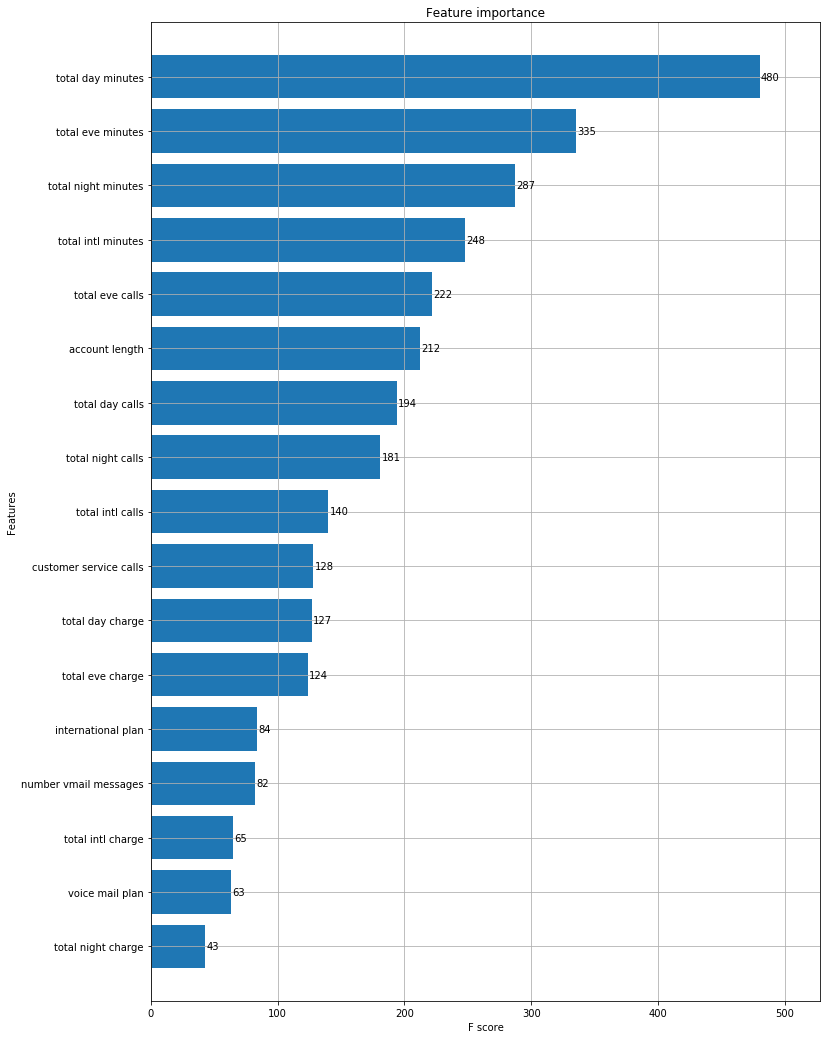

In [44]:
#Using more estimators increasing the train speed therefore 100 seemed suitable. 
#Higher max depth overfits the model. 
#subsample is used as the regularization effect
#High learning rates makes algorithm faster but does not yield accurate results thus keeping it to 0.1 is a good number
import xgboost as xgb

XGB = xgb.XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1, random_state=48)

XGB.fit(X_train,y_train)

#Identifying the important features
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(XGB, max_num_features=50, height=0.8, ax=ax)

plt.show()

This chart gives up a much better representation of the important features useful to us, more so than the correlation matrix. We can deduce that the total day minutes and total evening minutes were critically important variables.
On the other hand, the total international charges and total night charges were of lesser importance. 

## XG Boost Hyperparameter Tuning

In [45]:
paramgrid_xgb = {'max_depth':[3,5,10], 
                 'learning_rate':[0.1,0.5,1]}

In [46]:
optimalmodel_xgb = GridSearchCV(xgb.XGBClassifier(random_state=57), paramgrid_xgb, cv=skf, scoring="roc_auc")
optimalmodel_xgb.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=110, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=57, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [3, 5, 10]},
             pre_dispatch='2*n

In [47]:
xgb_bestestimator = optimalmodel_xgb.best_estimator_

In [48]:
optimalmodel_xgb.best_params_

{'learning_rate': 1, 'max_depth': 3}

In [49]:
optimalmodel_xgb.best_score_ #Cross Validation Score

0.9186346774324367

Through hyperparameter tuning we can see an improvement in our cross validation score

# Random Forest Classifier

Our final chosen model will be the Random Forest Classifier

In [50]:
#Instantiate the RF classifier
model_RF = RandomForestClassifier(random_state=56)

In [51]:
model_RF.fit(X_train_v, y_train_v)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=56, verbose=0,
                       warm_start=False)

Train

In [52]:
y_train_pred = model_RF.predict_proba(X_train_v)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred))

ROC_AUC of model = 1.0


Validation 

In [53]:
y_val_pred = model_RF.predict_proba(X_val)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred))

ROC_AUC of model = 0.9269717624148004


## Random Forest Hyperparameter Tuning

In [54]:
parametersgridrf = {'max_depth':[3,5,7],
                   'min_samples_leaf':[1,3,5]
                   }

In [55]:
optimalmodel_RF = GridSearchCV(RandomForestClassifier(random_state=58), parametersgridrf, cv=skf, scoring="roc_auc")
optimalmodel_RF.fit(X_train_v, y_train_v) 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=110, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [56]:
pd.DataFrame(optimalmodel_RF.cv_results_) #Number of test score columns*number of rows are how many tests were carried out

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.276056,0.052595,0.020492,0.009683,3,1,"{'max_depth': 3, 'min_samples_leaf': 1}",0.911259,0.869914,0.893465,0.891546,0.016934,9
1,0.256159,0.049930,0.013854,0.000538,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.912402,0.871430,0.895064,0.892965,0.016792,7
2,0.260681,0.049237,0.020068,0.006832,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.911122,0.872299,0.894341,0.892587,0.015898,8
3,0.254513,0.005761,0.013961,0.000236,5,1,"{'max_depth': 5, 'min_samples_leaf': 1}",0.929730,0.886677,0.905792,0.907400,0.017613,4
4,0.249307,0.008037,0.014002,0.000207,5,3,"{'max_depth': 5, 'min_samples_leaf': 3}",0.934103,0.882532,0.902624,0.906420,0.021224,6
5,0.341080,0.081633,0.021567,0.008016,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",0.929364,0.887714,0.903178,0.906752,0.017190,5
6,0.282688,0.008569,0.014882,0.000264,7,1,"{'max_depth': 7, 'min_samples_leaf': 1}",0.939376,0.884833,0.904254,0.909488,0.022573,2
7,0.362816,0.093370,0.019578,0.006108,7,3,"{'max_depth': 7, 'min_samples_leaf': 3}",0.935719,0.891143,0.908730,0.911864,0.018333,1
8,0.286000,0.011919,0.015310,0.000615,7,5,"{'max_depth': 7, 'min_samples_leaf': 5}",0.933799,0.889177,0.901963,0.908313,0.018762,3


In [57]:
optimalmodel_RF.best_params_

{'max_depth': 7, 'min_samples_leaf': 3}

In [58]:
optimalmodel_RF.best_score_ #Cross Validation Score

0.9118638968756314

Less than the pre-tuning validation score. Tune the parameters and see if it makes a difference

### Random Forest Hyperparameter Tuning 2nd

In [59]:
#By adding additional parameters we are to trying to improve on our cross validation score

parametersgridrf2 = {'max_depth':[3,5,7,9],
                   'min_samples_leaf':[1,3,5,7],
                   'n_estimators':[200],
                    'min_samples_split':[5,7,9,11]}

In [60]:
#Assigning new variables to the optimal models to avoid confusion with the previous

optimalmodel_RF2 = GridSearchCV(RandomForestClassifier(random_state=58), parametersgridrf2, cv=skf, scoring="roc_auc")
optimalmodel_RF2.fit(X_train_v, y_train_v) 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=110, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [61]:
pd.DataFrame(optimalmodel_RF2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.591217,0.121393,0.032480,0.009980,3,1,5,200,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.904584,0.868710,0.891134,0.888143,0.014798,57
1,0.509618,0.059155,0.033713,0.007357,3,1,7,200,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.903502,0.868740,0.891104,0.887782,0.014385,62
2,0.623628,0.178954,0.037242,0.011257,3,1,9,200,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.903533,0.867734,0.891150,0.887472,0.014844,64
3,0.511957,0.075843,0.036874,0.017299,3,1,11,200,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.903456,0.867872,0.891196,0.887508,0.014760,63
4,0.534418,0.105498,0.032637,0.010635,3,3,5,200,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.904416,0.869822,0.891965,0.888735,0.014307,49
5,0.427632,0.031418,0.025238,0.000431,3,3,7,200,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.904035,0.869838,0.892057,0.888643,0.014168,54
6,0.566050,0.120515,0.030428,0.007697,3,3,9,200,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.904157,0.868999,0.891519,0.888225,0.014541,55
7,0.608423,0.143063,0.036583,0.012158,3,3,11,200,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.903990,0.869045,0.891596,0.888210,0.014466,56
8,0.423169,0.019252,0.025059,0.000463,3,5,5,200,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.902786,0.872162,0.890996,0.888648,0.012612,51
9,0.409240,0.001296,0.025299,0.000923,3,5,7,200,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.902786,0.872162,0.890996,0.888648,0.012612,51


In [62]:
optimalmodel_RF2.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 11,
 'n_estimators': 200}

In [63]:
optimalmodel_RF2.best_score_

0.9131874948495388

This was an improvement on the first hyperparameter tuned score. But still not more than the pre-hyperparameter tuned score.

# Evaluation

By checking the validation scores, I have found out that the best model was Random Forest Classifier before the Hyperparameter tuning. This produced a result of 0.9269717624148004. Circa 92.7%

However, after hyperparameter tuning twice and by adding additional parameters, this produced results of 0.9118638968756314 and 0.9131874948495388 respectively

In contrast, 

the scores for Decision Trees on the Validation Training Data set were: 0.73645847823063 (approx 73.6%)
and after the Hyperparameter Tuning: 0.9015292140538281 (approx 90.2%)

the scores for XG Boost on the Validation Training Data set were: 0.8880094588955348 (approx 88.8%)
and after the Hyperparameter Tuning: 0.9186346774324367 (approx 91.9%)

## Model Discrimination Comparison (ROC_AUC)

We will produce ROC curves of the Random Forest Classifiers. What ROC curves tell us are a measure of the True Positive Rate against the False Positive Rate. 

With values closer to 1 being a perfect classifier and those towards the 0.5 mark, representing 50% precision. 

All of our models produced results above 0.5, but the Random Forest Classifier produced the best results, as it was the most close to the 1.0 score. 

We shall draw some curves to demonstrate this in the forthcoming cells

In the next cell we will be calculating the ROC_AUC of our Test data using the Random Forest Classifier model

## Random Forest Classifier Test

In [64]:
#This gives me the probabilities of it being 0 or 1

y_test_pred_proba = model_RF.predict_proba(X_test)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_test, y_test_pred_proba))

ROC_AUC of model = 0.893779112794393


In [65]:
y_test_pred = model_RF.predict(X_test)  #This is our predictions by using a threshold of 0.5. I need to calculate fm using this value

In [66]:
#Import confusion matrix 

#This plots the binary values

from sklearn.metrics import confusion_matrix

 
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', cnf_matrix)  #This is for a threshold of 0.5

Confusion Matrix:
 [[582   7]
 [ 27  51]]


## Threshold Selection

We must consider the cost of our problem and prevalence of our classes

The cost of our problem will take into consideration the loss in recurring revenue (ARR), 

The loss of renewal income - Up selling to a customer is always more probable than signing on a new customer and if the current customer leaves then it will cost more money and time for an organisation to sign on a new customer. (LEOR)

It is the duty of the organisation to hold on to the customer.

and cost to acquire new customers (otherwise known as the customer acquisition cost CAC) - This happens as the digital team such as advertisement & marketing are responsible for committing an allowance to bring in new customers in the form of flyers/e-mails/TV advertisements/billboards.

Per year and per customer this could cost an estimated $90,000 to an organisation. 

In conclusion, it can cost 5 times as much to acquire a new customer, than to retain the existing

The churn rate for Vodafone in Q4 2019  was 24.7%. This is higher than our prevalence rate for SyriaTel of 14.5%

In [76]:
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [78]:
Prevalence = 0.247 #Benchmark figure used as churn comparison to calculate the Metz value


FN = 90000 #False Negative. 

TN = 0 #True Negative

TP = 18000 #True Positive

FP = 18000 #False Positive

#These parameters will be explained in greater depth once the matrix has been produced

In [82]:
m = (1 - Prevalence)/Prevalence

Cost = (FP-TN)/(FN-TP)

m = m*Cost
m

0.7621457489878543

In [83]:
y_train_hat = model_RF.predict_proba(X_test)[:,1]

In [84]:
print("ROC_AUC of model =", roc_auc_score(y_test, y_train_hat))

ROC_AUC of model = 0.893779112794393


In [86]:
fpr, tpr, threshold = roc_curve(y_test, y_train_hat)

In [89]:
fm = tpr - (m*fpr)

fm

array([0.        , 0.01282051, 0.03846154, 0.08974359, 0.1025641 ,
       0.12820513, 0.17948718, 0.24358974, 0.28205128, 0.32051282,
       0.34615385, 0.35897436, 0.41025641, 0.43589744, 0.4602445 ,
       0.48588552, 0.51152655, 0.52305309, 0.56151463, 0.58715566,
       0.59997617, 0.61020875, 0.63584978, 0.64608236, 0.64478839,
       0.65631494, 0.6767801 , 0.70242113, 0.72806216, 0.72547422,
       0.74852732, 0.74723335, 0.7587599 , 0.75617197, 0.75358404,
       0.75229007, 0.74711421, 0.74193835, 0.73417455, 0.72770473,
       0.72252886, 0.72629162, 0.71982179, 0.71852782, 0.71464593,
       0.72605333, 0.71699557, 0.71052574, 0.70534988, 0.7065247 ,
       0.70640556, 0.68699608, 0.66888056, 0.65064589, 0.65170157,
       0.62699708, 0.57912036, 0.543945  , 0.48054068, 0.38090533,
       0.32632049, 0.25373927, 0.23785425])

In [118]:
list(zip(fm.tolist(),threshold.tolist()))

#this array we will identify the optimal fm and optimal threshold

[(0.0, 2.0),
 (0.01282051282051282, 1.0),
 (0.038461538461538464, 0.95),
 (0.08974358974358974, 0.87),
 (0.10256410256410256, 0.86),
 (0.1282051282051282, 0.84),
 (0.1794871794871795, 0.79),
 (0.24358974358974358, 0.77),
 (0.28205128205128205, 0.73),
 (0.32051282051282054, 0.72),
 (0.34615384615384615, 0.71),
 (0.358974358974359, 0.7),
 (0.41025641025641024, 0.69),
 (0.4358974358974359, 0.68),
 (0.4602444959204856, 0.67),
 (0.4858855215615112, 0.65),
 (0.5115265472025368, 0.64),
 (0.5230530944050737, 0.62),
 (0.5615146328666122, 0.58),
 (0.5871556585076378, 0.57),
 (0.5999761713281506, 0.55),
 (0.6102087529127115, 0.54),
 (0.6358497785537371, 0.53),
 (0.646082360138298, 0.52),
 (0.644788394520322, 0.51),
 (0.6563149417228588, 0.5),
 (0.6767801048919805, 0.47),
 (0.7024211305330061, 0.45),
 (0.7280621561740318, 0.43),
 (0.7254742249380799, 0.42),
 (0.7485273193431535, 0.4),
 (0.7472333537251775, 0.38),
 (0.7587599009277144, 0.37),
 (0.7561719696917624, 0.34),
 (0.7535840384558105, 0.33)

In [93]:
#0.7587599009277144 is the fm score  0.37 - optimal threshold is 37

In [94]:
probs_list_test = model_RF.predict_proba(X_test)[:,1]
final_res =[]
for x in probs_list_test:
    if x > 0.37:
        final_res.append(1)
    else:
        final_res.append(0)
final_res
len(final_res)

667

In [98]:
confusion_final_matrix = confusion_matrix(y_test, final_res)

print('Confusion Matrix:\n',confusion_final_matrix) #Using our optimal threshold of 0.37

Confusion Matrix:
 [[572  17]
 [ 18  60]]


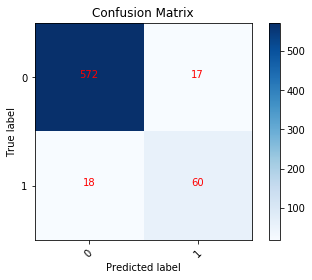

In [99]:
#To make our confusion matrix more visually appealling

import itertools

plt.imshow(confusion_final_matrix,  cmap=plt.cm.Blues) 
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = confusion_final_matrix.max() 
for i, j in itertools.product(range(confusion_final_matrix.shape[0]), range(confusion_final_matrix.shape[1])):
        plt.text(j, i, confusion_final_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if confusion_final_matrix[i, j] > thresh else 'red')
plt.colorbar()
plt.show() 

TP = 572, We predicted the customer to churn and they did. i.e. the TRUE POSITIVE. #90k

FP = 17, We wrongly predicted the customer to churn but they did not i.e. the FALSE POSITIVE. #18k


In the second row, 


FN = 18, We predicted the customer would not churn but they did. i.e.  the FALSE NEGATIVE #18k

TN = 60, Business as usual. We predicted the customer wouldn't churn and they didn't. i.e.the TRUE NEGATIVE #0k

## Cost of Churn to SyriaTel

Seeing as the overall churn rate was approximately 14%. Out of a total of 3333 customers, 467 customers would have left the business. Thus costing SyriaTel an estimated $42,023,000 including the factors of ARR, LEOR, and CAC. 

Based on the model evaluation we can see that the customers who are churning ((572*90,000) + (18*90000)) - (17*90000)
= $50.274m 

We are therefore seeing a greater net loss of $8.244m

## Matrix Evaluation

In [109]:
accuracy = print('Accuracy score is: ', accuracy_score(y_test, final_res))
roc_score = print('ROC_score is: ', roc_auc_score(y_test, y_train_hat))
precision = print('Precision score is: ', precision_score(y_test, final_res))
recall = print('Recall score is: ', recall_score(y_test, final_res))


Accuracy score is:  0.9475262368815592
ROC_score is:  0.893779112794393
Precision score is:  0.7792207792207793
Recall score is:  0.7692307692307693


In [114]:
from sklearn.metrics import f1_score

f1_score = print('F1 score is: ', f1_score(y_test, final_res))

F1 score is:  0.7741935483870968


## Matrix Coefficient Interpretation

From our coefficients, we can say that the two most informative attributes are the accuracy and f1 score

Accuracy, where we have produced 94.7% shows the number of predictions the model has been produced correctly. Or in this case likelihood of customer churn. We can say that the chosen model has performed effectively in this case. 

The accuracy metric is the one that gives a holistic overview of our model's performance therefore I am content with the selection of the Random Forest Classifier.

F1 score, represents the harmonic mean of precision and recall, thereby meaning it is dependent on the precision and recall. As we can see the precision and recall scores are both around the 76.9-77.9% mark. Hence our model performs well in this case. 

The precision metric is a little in grey area, it essentially represents  out how many times the model said someone churned, did they actually churn? Further tuning can effect the precision score as it may miss vitally critical customers likely to churn. With our precision score of 77.9%. It is saying that of the 14.7% churning, only 77.9% of that number ACTUALLY churn.

The recall score of 76.9% suggests that of the 14.7% data that churn, the model is 76.9% correct of identifying the individuals to churn. 

The relationship between precision and recall is inversely proportionate and for our business case scenario it is more beneficial to have a model to identify False Negatives because we want to reduce the churn as much as possible by actively identifying the customers. While False Positives may irritate a customer, as they may find themselves being wrongfully accused of churning, from a loss of revenue standpoint, customer retention is much better than customer attrition

In [115]:
#Import the library to plot the ROC curve

from sklearn.metrics import roc_curve, auc

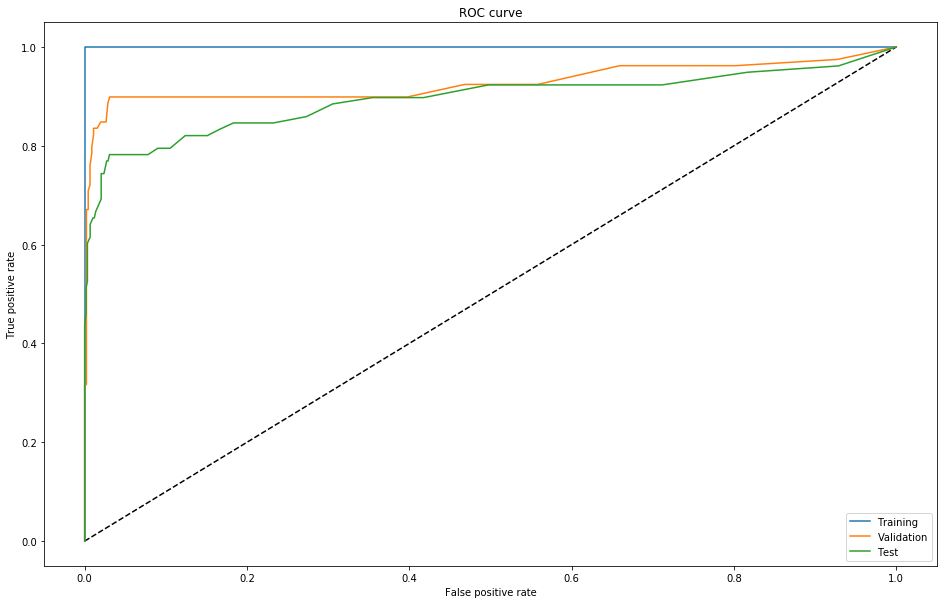

In [116]:
#Calculate the probability score at each of the datapoints in the train validation data set

probs_train = model_RF.predict_proba(X_train_v)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_v, probs_train[:,1])

probs_val = model_RF.predict_proba(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, probs_val[:,1])

probs_test = model_RF.predict_proba(X_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test[:,1])


plt.figure(figsize=(16,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Training')
plt.plot(fpr_val, tpr_val, label='Validation')
plt.plot(fpr_test, tpr_test, label='Test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
 


## Interpreting the ROC Curve

Our ROC_AUC score for validation and test scores were both above 0.85 thereby suggesting a very good result. While a perfect score of 1.0 would raise eyebrows and a score closer to 0.5 would be considered worthless, we can confidently say we have produced a good result. 

# Actionable Solution

For SyriaTel to reduce its customer churn, it is advised to approach the customers who are likely to churn directly and offer an incentive to remain on the network. This could be longer contracts with more minutes and reduce charges. In addition to offering perks like gadgets such as a fitness tracker and improved digital services such as more 4G data, or if available, 5G. 

Improved network coverage and free international roaming in certain countries are also viable options as we have investigated a dataset comprised of information from 50 US states. 